<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/03_Deep%20Learning%20Projects/Artificial%20Neural%20Network%20(ANN)/ANN%20for%20Classification/Fraud_detection%20prediction/Bank_fraud_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

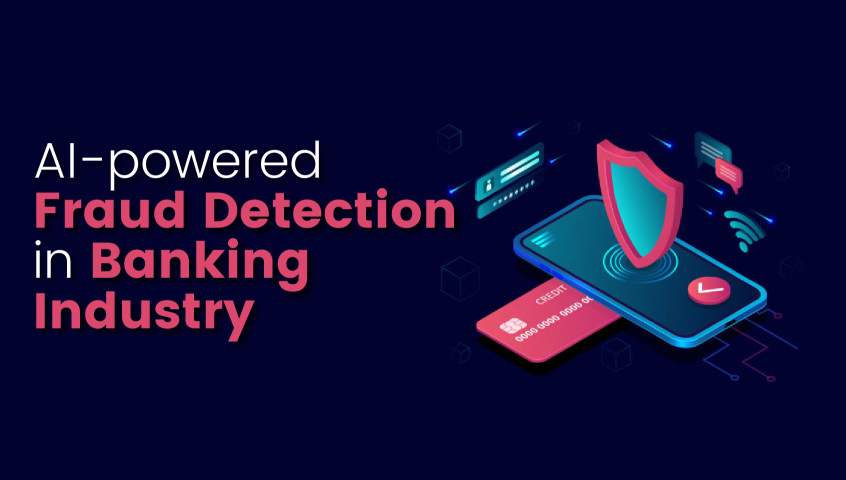
#**🏦Bank Transaction Fraud Detection using Artificial Neural Network (ANN)**

#**📘 Project Summary:**
This project applies a Deep Learning Artificial Neural Network (ANN) to detect fraudulent banking transactions by analyzing complex behavioral and transactional patterns. The model learns from input features such as device_type, browser, operating_systema, click_duration, scroll_depth, mouse_movement, keystrokes_detected, ad_position, click_frequency, time_since_last_click, device_ip_reputation, VPN_usage, proxy_usage, and bot_likelihood_score to distinguish between legitimate transactions and potentially fraudulent ones with high precision.

The ANN model achieved an impressive 99% accuracy, clearly differentiating between:

Legitimate Transactions — genuine and consistent customer activities

Fraudulent Transactions — irregular or suspicious patterns indicating possible fraud


This high-performing model demonstrates the strength of deep learning in handling complex, nonlinear relationships in financial data.

##**🎯 Aim of the Project:**
The primary aim is to build an intelligent fraud detection system capable of accurately identifying fraudulent transactions in real-time. This helps banks and financial institutions reduce fraud-related losses, improve transaction security, and protect customer trust through automated, data-driven insights.


##**Data Loading and exploration**

In [23]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/click_fraud_dataset.csv")
pd.set_option("display.max_columns", None)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,click_id,timestamp,user_id,ip_address,device_type,browser,operating_system,referrer_url,page_url,click_duration,scroll_depth,mouse_movement,keystrokes_detected,ad_position,click_frequency,time_since_last_click,device_ip_reputation,VPN_usage,proxy_usage,bot_likelihood_score,is_fraudulent
0,d875835d-3a4a-4a20-b0d1-6cddf89afc6a,2024-08-23 02:47:39,65a2f621-707b-49be-9c3e-ccac0b1d89ef,141.36.49.37,Tablet,Safari,Android,https://evans-ford.com/,http://www.turner-stewart.com/,0.29,60,111,8,Bottom,7,72,Good,0,1,0.29,0
1,a2d3f028-7790-4be1-9f75-df1357edbbdb,2025-01-30 23:23:50,135e0114-76c5-43ea-bdef-80ab537dc009,216.29.19.201,Desktop,Opera,iOS,https://pierce-ferguson.net/,http://www.rodriguez.biz/,0.64,25,452,29,Bottom,9,201,Suspicious,0,0,0.74,0
2,36d787b2-fbce-43ef-8c02-7c8746d7e3db,2025-01-21 05:41:12,a6922984-78cb-4c01-9c88-bfe3a13a0aaf,167.133.41.231,Tablet,Safari,Linux,https://www.martinez.com/,https://beck.biz/,0.42,36,431,18,Bottom,9,326,Good,0,1,0.14,0
3,01fc0078-096b-4f90-82ae-aa8085b719ac,2024-10-12 08:18:14,d30788b2-4048-4770-a4b1-a9358788818f,216.146.33.78,Tablet,Edge,macOS,https://jones-mendoza.com/,https://www.alvarado.com/,4.29,29,472,37,Side,4,33,Suspicious,0,0,0.65,0
4,0afdf2af-0b48-47d5-bfb6-e087053e1eb9,2024-04-19 14:44:35,dfc42287-6325-4344-b373-b8e61ea6e5c1,146.37.54.245,Desktop,Opera,Windows,https://www.griffith-holloway.com/,http://gonzalez.com/,2.46,94,50,2,Side,7,97,Good,0,0,0.06,0


In [24]:
#Checking to see if there is duplicates or Null values
print(f"Null_values: {df.isna().sum()}")
print("\n")
print(f"Duplicate values: {df.duplicated().sum()}")

Null_values: click_id                 0
timestamp                0
user_id                  0
ip_address               0
device_type              0
browser                  0
operating_system         0
referrer_url             0
page_url                 0
click_duration           0
scroll_depth             0
mouse_movement           0
keystrokes_detected      0
ad_position              0
click_frequency          0
time_since_last_click    0
device_ip_reputation     0
VPN_usage                0
proxy_usage              0
bot_likelihood_score     0
is_fraudulent            0
dtype: int64


Duplicate values: 0


##**Feature Engineering**

In [25]:
#converting timestamp from string to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

#extracting year, month, day, day's of the week, hour and weekend from timestamp
df["year"] = pd.to_datetime(df["timestamp"]).dt.year
df["month"] = pd.to_datetime(df["timestamp"]).dt.month
df["day"] = pd.to_datetime(df["timestamp"]).dt.day
df["days of the week"] = pd.to_datetime(df["timestamp"]).dt.day_of_week
df["hour"] = pd.to_datetime(df["timestamp"]).dt.hour
df["weekend"] = (df["timestamp"].dt.day_of_week >= 5).astype(int)

# converting categorical columns into onehotencoding
df = pd.get_dummies(df, drop_first=True, columns=["device_type","device_ip_reputation","browser","operating_system", "ad_position"], dtype=int)

#dropping unused columns
df = df.drop(columns=["click_id","timestamp","user_id","referrer_url","page_url", "ip_address"])
df.head()

,click_duration,scroll_depth,mouse_movement,keystrokes_detected,click_frequency,time_since_last_click,VPN_usage,proxy_usage,bot_likelihood_score,is_fraudulent,year,month,day,days of the week,hour,weekend,device_type_Mobile,device_type_Tablet,device_ip_reputation_Good,device_ip_reputation_Suspicious,browser_Edge,browser_Firefox,browser_Opera,browser_Safari,operating_system_Linux,operating_system_Windows,operating_system_iOS,operating_system_macOS,ad_position_Side,ad_position_Top
0,0.29,60,111,8,7,72,0,1,0.29,0,2024,8,23,4,2,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,0.64,25,452,29,9,201,0,0,0.74,0,2025,1,30,3,23,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,0.42,36,431,18,9,326,0,1,0.14,0,2025,1,21,1,5,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0
3,4.29,29,472,37,4,33,0,0,0.65,0,2024,10,12,5,8,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0
4,2.46,94,50,2,7,97,0,0,0.06,0,2024,4,19,4,14,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


##**I noticed the target variable is imbalanced**

In [26]:
#inbalanced target features
df["is_fraudulent"].value_counts()

,count
is_fraudulent,
0,3759
1,1241


##**Create input features and target variable**

In [27]:
 x = df.drop(columns=["is_fraudulent"]) # Features
 y = df["is_fraudulent"] # Targe

## **Applying SMOTE for Oversampling**

Using SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples for the minority class and balance the dataset.

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

x = x_resampled
y = y_resampled

##**Verifying to see if my target variable dataset are balanced**

In [29]:
y.value_counts()

,count
is_fraudulent,
0,3759
1,3759


##**Model Preparation: Spliting into train/test sets to evaluate performance.**

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify = y)

##**Scaling features Using StandardScaler**

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = pd.DataFrame(scale.fit_transform(x_train), columns=x.columns)
x_test = pd.DataFrame(scale.fit_transform(x_test), columns=x.columns)


##**Model Building: training ANN (Deep Learning) Model**

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

ANN = Sequential([Dense(20, input_shape=(29,), activation="relu"),
                    Dense(1, activation="sigmoid")])

ANN.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

ANN.fit(x_train, y_train, epochs=18)

Epoch 1/18


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5773 - loss: 0.7459
Epoch 2/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8498 - loss: 0.3817
Epoch 3/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8985 - loss: 0.2596
Epoch 4/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9297 - loss: 0.1939
Epoch 5/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9522 - loss: 0.1478
Epoch 6/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9650 - loss: 0.1163
Epoch 7/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9782 - loss: 0.0891
Epoch 8/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9793 - loss: 0.0774
Epoch 9/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.0672
Epoch 10/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9867 - loss: 0.0568
Epoch 11/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9911 - loss: 0.0465
Epoch 12/18
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

##**Model score**

In [33]:
Accuracy, Loss = ANN.evaluate(x_test, y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0347


##**Classification report: Accuracy / F1-Score | 80%**

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = ANN.predict(x_test)
y_pred = np.round(y_pred)
Class_report = classification_report(y_test, y_pred)
print(Class_report)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       752
           1       0.99      0.99      0.99       752

    accuracy                           0.99      1504
   macro avg       0.99      0.99      0.99      1504
weighted avg       0.99      0.99      0.99      1504



##**visualising using confusion matrix**

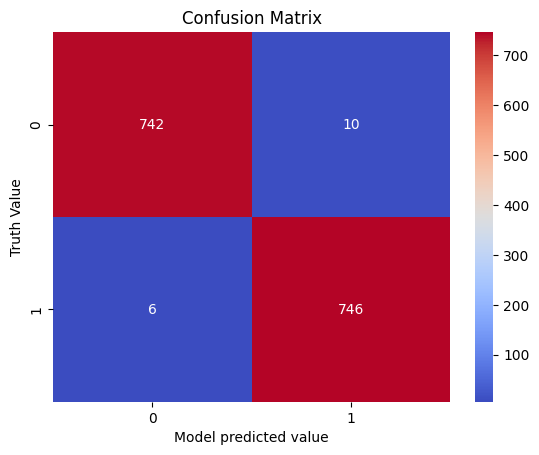

In [35]:
cm = confusion_matrix(y_test, y_pred)

# Importing pyplot from matplotlib to visualize the confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.xlabel("Model predicted value")
plt.ylabel("Truth Value")
plt.title("Confusion Matrix")
plt.show()

##**📊 Results & Insights:**
The ANN model effectively detected fraudulent patterns with very high remarkable accuracy of 99%, minimizing both false positives (flagging legitimate transactions) and false negatives (missing actual frauds). This ensures a reliable and efficient fraud detection pipeline suitable for real-world financial applications.

##**Conclusion (Deployment Use Case):**
When deployed, this model can be integrated into a bank’s transaction monitoring system to automatically flag suspicious activities as they occur. It can assist fraud analysts by providing real-time alerts, enabling faster decision-making and preventive action.
With continuous retraining on new data, the system can adapt to evolving fraud tactics, ensuring sustained accuracy and robust financial security.